## Mosquito Habitat

Let's explore how different larval habitat models respond to climate and the downstream impact on mosquito abundances.

In [1]:
from dtk.utils.core.DTKConfigBuilder import DTKConfigBuilder
from dtk.vector.study_sites import configure_site

cb = DTKConfigBuilder.from_defaults('VECTOR_SIM',
                                    Simulation_Duration=5*365)
configure_site(cb, 'Sinazongwe')

run_sim_args =  { 'config_builder' : cb,
                  'exp_name'       : 'HabitatDemo' }

In [2]:
from dtk.vector.species import set_larval_habitat

def arabiensis_extinction(cb):
    # Low-level An. arabiensis transmission with temporary rainfall-driven habitat only
    # leading to extinction during dry-season
    set_larval_habitat(cb, {'arabiensis': {"TEMPORARY_RAINFALL": 4e8 }})
    
def arabiensis_with_small_constant_component(cb):
    # Low-level An. arabiensis transmission with temporary rainfall-driven habitat
    # plus a small constant component leading to perpetuation through the dry-season
    set_larval_habitat(cb, {'arabiensis': {"TEMPORARY_RAINFALL": 4e8,
                                           "CONSTANT"          : 5e7 }})
    
def arabiensis_funestus_vectors(cb):
    # Multiple vector species: An. arabiensis and An. funestus
    # Tune parameters to observed biting rates by species, sporozoite rates
    set_larval_habitat(cb, {'arabiensis': {"TEMPORARY_RAINFALL": 2e10,
                                           "CONSTANT"          : 1e7},
                            'funestus'  : {"WATER_VEGETATION"  : 2e9}})

In [3]:
from dtk.interventions.itn import add_ITN

def child_ITN_distribution(cb, coverage):
    # Distribute default ITN to under-5-yr-old children at specified coverage
    add_ITN(cb, start=3*365, coverage_by_ages=[{'coverage': coverage, 'min':0, 'max': 5}], receiving_itn_event={})
    
def population_ITN_distribution(cb, coverage):
    # Distribute default ITN to all ages at specified coverage
    add_ITN(cb, start=3*365, coverage_by_ages=[{'coverage': coverage}], receiving_itn_event={})

In [4]:
arabiensis_funestus_vectors(cb)
population_ITN_distribution(cb, coverage=0.9)

In [5]:
from dtk.utils.analyzers import sample_selection, group_by_name, plot_grouped_lines, \
                                TimeseriesAnalyzer, VectorSpeciesAnalyzer

analyzers = [ TimeseriesAnalyzer(
                filename='InsetChart.json',
                channels=['Rainfall', 'Adult Vectors', 'Daily EIR', 'Infected'],
                select_function=sample_selection(freq='W', start_date='1/1/2000'),
                group_function=group_by_name('_site_'),
                plot_function=plot_grouped_lines
                ),
              VectorSpeciesAnalyzer(
                filename='VectorSpeciesReport.json',
                channels=['Adult Vectors', 'Daily EIR'],        
                select_function=sample_selection(freq='W', start_date='1/1/2000'),
                group_function=group_by_name('_site_'),
                )
            ]

C:\Users\braybaud\PycharmProjects\venv\dtk\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Users\braybaud\PycharmProjects\venv\dtk\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [6]:
from utils import get_sim_manager, run_demo, monitor_status, draw_plots

sm = get_sim_manager()

In [7]:
def rerun():
    run_demo(sm, run_sim_args)
    monitor_status(sm)
    draw_plots(sm, analyzers)

{'exp_id': '2016_02_18_07_23_10_969000',
 'exp_name': 'HabitatDemo',
 'location': 'LOCAL',
 'sim_root': 'C:\\Users\\braybaud\\PycharmProjects\\dtk-tools\\examples\\notebooks\\simulations',
 'sim_type': 'VECTOR_SIM',
 'sims': {'2016_02_18_07_23_10_982000': {'jobId': 8556}}}

Job states:
{
    "8556": "Running"
}
{'Running': 1}
Job states:
{
    "8556": "Running (17% complete)"
}
{'Running': 1}
Job states:
{
    "8556": "Running (34% complete)"
}
{'Running': 1}
Job states:
{
    "8556": "Running (49% complete)"
}
{'Running': 1}
Job states:
{
    "8556": "Running (63% complete)"
}
{'Running': 1}
Job states:
{
    "8556": "Running (77% complete)"
}
{'Running': 1}
Job states:
{
    "8556": "Running (91% complete)"
}
{'Running': 1}
Job states:
{
    "8556": "Finished"
}
{'Finished': 1}
(0, '2016_02_18_07_23_10_982000')


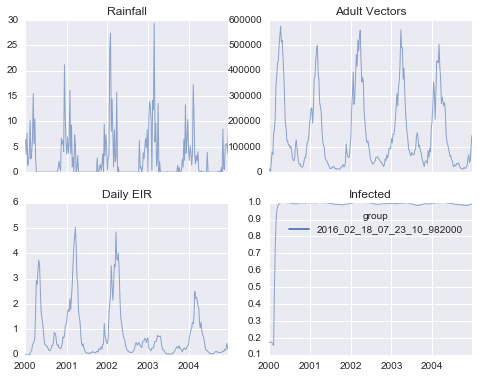

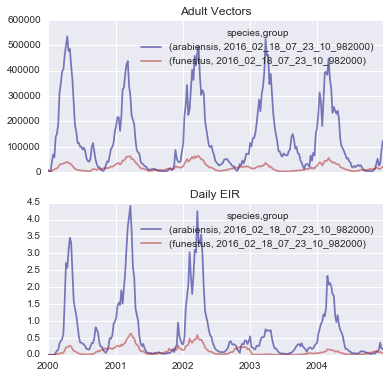

In [8]:
%matplotlib inline
rerun()